# Dogs vs Cats Image Classification Without Image Augmentation

We'll build an image classifier using `tf.keras.Sequential` model and load data using `tf.keras.preprocessing.image.ImageDataGenerator`.

## Specific concepts that will be covered:
In the process, we will build practical experience and develop intuition around the following concepts

* Building _data input pipelines_ using the `tf.keras.preprocessing.image.ImageDataGenerator` class — How can we efficiently work with data on disk to interface with our model?


<hr>


**Before you begin**

Before running the code in this notebook, reset the runtime by going to **Runtime -> Reset all runtimes** in the menu above. If you have been working through several notebooks, this will help you avoid reaching Colab's memory limits.


# Importing packages

Let's start by importing required packages:

*   os — to read files and directory structure
*   numpy — for some matrix math outside of TensorFlow
*   matplotlib.pyplot — to plot the graph and display images in our training and validation data


In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import random
from six.moves import urllib
import collections

In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Data Loading

To build our image classifier, we begin by downloading the dataset.


In [5]:
_URL = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
tgz_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

228818944/228813984 [==============================] - 6s 0us/step


The dataset we have downloaded has the following directory structure.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
    |______ <b>daisy</b>: [daisy.0.jpg, daisy.1.jpg, daisy.2.jpg ...]
    |______ <b>dandelion</b>: [dandelion.0.jpg, dandelion.1.jpg, dandelion.2.jpg ...]
    |______ <b>roses</b>: [roses.0.jpg, roses.1.jpg, roses.2.jpg ...]
    |______ <b>sunflower</b>: [sunflower.0.jpg, sunflower.1.jpg, sunflower.2.jpg ...]
    |______ <b>tulips</b>: [tulips.0.jpg, tulips.1.jpg, tulips.2.jpg ...]
</pre>

We can list the directories with the following terminal command:

In [6]:
tgz_dir_base = os.path.dirname(tgz_dir)
!find $tgz_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/tulips


In [7]:
if not os.path.exists("/root/.keras/datasets/flower_photos/train"):
  shutil.copytree("/root/.keras/datasets/flower_photos", "/root/.keras/datasets/flower_photos/train")
  lista = ["daisy", "roses", "dandelion", "sunflowers", "tulips"]
  for lis in lista:
    shutil.rmtree("/root/.keras/datasets/flower_photos/"+lis)

In [8]:
tgz_dir_base = os.path.dirname(tgz_dir)
!find $tgz_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/train
/root/.keras/datasets/flower_photos/train/daisy
/root/.keras/datasets/flower_photos/train/roses
/root/.keras/datasets/flower_photos/train/dandelion
/root/.keras/datasets/flower_photos/train/sunflowers
/root/.keras/datasets/flower_photos/train/tulips


In [9]:
os.mkdir("/root/.keras/datasets/flower_photos/validation")
os.mkdir("/root/.keras/datasets/flower_photos/validation/daisy")
os.mkdir("/root/.keras/datasets/flower_photos/validation/roses")
os.mkdir("/root/.keras/datasets/flower_photos/validation/dandelion")
os.mkdir("/root/.keras/datasets/flower_photos/validation/sunflowers")
os.mkdir("/root/.keras/datasets/flower_photos/validation/tulips")

In [14]:
minimo = np.inf
for lis in lista:
  files = os.listdir("/root/.keras/datasets/flower_photos/train/"+lis)
  largo = len(files)
  if largo<minimo:
    minimo = largo

def getRandomFile(path):
     files = os.listdir(path)
     random.shuffle(files)
     for file in files[minimo:]:
       os.remove(path+"/"+file)
     elements = int(minimo*0.2)
     return files[:elements]

for lis in lista:
  files = getRandomFile("/root/.keras/datasets/flower_photos/train/"+lis)
  print(lis, "/root/.keras/datasets/flower_photos/validation/"+lis)
 
  for file in files:
    shutil.move("/root/.keras/datasets/flower_photos/train/"+lis+"/"+file,"/root/.keras/datasets/flower_photos/validation/"+lis)

daisy /root/.keras/datasets/flower_photos/validation/daisy
roses /root/.keras/datasets/flower_photos/validation/roses
dandelion /root/.keras/datasets/flower_photos/validation/dandelion
sunflowers /root/.keras/datasets/flower_photos/validation/sunflowers
tulips /root/.keras/datasets/flower_photos/validation/tulips


<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>train</b>
    |______ <b>daisy</b>: [daisy.0.jpg, daisy.1.jpg, daisy.2.jpg ...]
    |______ <b>dandelion</b>: [dandelion.0.jpg, dandelion.1.jpg, dandelion.2.jpg ...]
    |______ <b>roses</b>: [roses.0.jpg, roses.1.jpg, roses.2.jpg ...]
    |______ <b>sunflower</b>: [sunflower.0.jpg, sunflower.1.jpg, sunflower.2.jpg ...]
    |______ <b>tulips</b>: [tulips.0.jpg, tulips.1.jpg, tulips.2.jpg ...]
|__ <b>validation</b>
    |______ <b>daisy</b>: [daisy.0.jpg, daisy.1.jpg, daisy.2.jpg ...]
    |______ <b>dandelion</b>: [dandelion.0.jpg, dandelion.1.jpg, dandelion.2.jpg ...]
    |______ <b>roses</b>: [roses.0.jpg, roses.1.jpg, roses.2.jpg ...]
    |______ <b>sunflower</b>: [sunflower.0.jpg, sunflower.1.jpg, sunflower.2.jpg ...]
    |______ <b>tulips</b>: [tulips.0.jpg, tulips.1.jpg, tulips.2.jpg ...]
</pre>

In [15]:
tgz_dir_base = os.path.dirname(tgz_dir)
!find $tgz_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/validation
/root/.keras/datasets/flower_photos/validation/daisy
/root/.keras/datasets/flower_photos/validation/roses
/root/.keras/datasets/flower_photos/validation/dandelion
/root/.keras/datasets/flower_photos/validation/sunflowers
/root/.keras/datasets/flower_photos/validation/tulips
/root/.keras/datasets/flower_photos/train
/root/.keras/datasets/flower_photos/train/daisy
/root/.keras/datasets/flower_photos/train/roses
/root/.keras/datasets/flower_photos/train/dandelion
/root/.keras/datasets/flower_photos/train/sunflowers
/root/.keras/datasets/flower_photos/train/tulips


In [16]:
print(os.listdir("/root/.keras/datasets/flower_photos/validation/daisy"))

['14372713423_61e2daae88.jpg', '14330343061_99478302d4_m.jpg', '2621723097_736febb4a4_n.jpg', '8694909523_3ca25d449d_n.jpg', '16737503507_431768a927.jpg', '5679288570_b4c52e76d5.jpg', '5435522104_1d6a61b431_n.jpg', '11124324295_503f3a0804.jpg', '4753134939_8e87649db6.jpg', '8964198962_6d8593b533.jpg', '8071646795_2fdc89ab7a_n.jpg', '1441939151_b271408c8d_n.jpg', '6089825811_80f253fbe1.jpg', '517054463_036db655a1_m.jpg', '4482623536_b9fb5ae41f_n.jpg', '2479956481_8d1a9699be_n.jpg', '3637428148_a1dcccafa9_n.jpg', '6776075110_1ea7a09dd4_n.jpg', '16401288243_36112bd52f_m.jpg', '1031799732_e7f4008c03.jpg', '153210866_03cc9f2f36.jpg', '175106495_53ebdef092_n.jpg', '3706420943_66f3214862_n.jpg', '14600779226_7bbc288d40_m.jpg', '19544831049_0d738d4872_m.jpg', '5623010186_796ca8d29a.jpg', '9054268881_19792c5203_n.jpg', '8619103877_d8c82c5f34_n.jpg', '1306119996_ab8ae14d72_n.jpg', '4540555191_3254dc4608_n.jpg', '8383753520_8391dd80ee_m.jpg', '3758221664_b19116d61f.jpg', '512177035_70afc925c8.jpg

We'll now assign variables with the proper file path for the training and validation sets.

In [17]:
base_dir = os.path.join(os.path.dirname(tgz_dir), 'flower_photos')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_daisy_dir = os.path.join(train_dir, 'daisy')  # directory with our training cat pictures
train_roses_dir = os.path.join(train_dir, 'roses')  # directory with our training dog pictures
train_dandelion_dir = os.path.join(train_dir, 'dandelion')  # directory with our training cat pictures
train_sunflowers_dir = os.path.join(train_dir, 'sunflowers')  # directory with our training dog pictures
train_tulips_dir = os.path.join(train_dir, 'tulips')  # directory with our training cat pictures
validation_daisy_dir = os.path.join(validation_dir, 'daisy')  # directory with our training cat pictures
validation_roses_dir = os.path.join(validation_dir, 'roses')  # directory with our training dog pictures
validation_dandelion_dir = os.path.join(validation_dir, 'dandelion')  # directory with our training cat pictures
validation_sunflowers_dir = os.path.join(validation_dir, 'sunflowers')  # directory with our training dog pictures
validation_tulips_dir = os.path.join(validation_dir, 'tulips')  # directory with our training cat pictures

### Understanding our data

Let's look at how many cats and dogs images we have in our training and validation directory

In [18]:
num_daisy_tr = len(os.listdir(train_daisy_dir))
num_roses_tr = len(os.listdir(train_roses_dir))
num_dandelion_tr = len(os.listdir(train_dandelion_dir))
num_sunflowers_tr = len(os.listdir(train_sunflowers_dir))
num_tulips_tr = len(os.listdir(train_tulips_dir))

num_daisy_val = len(os.listdir(validation_daisy_dir))
num_roses_val = len(os.listdir(validation_roses_dir))
num_dandelion_val = len(os.listdir(validation_dandelion_dir))
num_sunflowers_val = len(os.listdir(validation_sunflowers_dir))
num_tulips_val = len(os.listdir(validation_tulips_dir))

total_train = num_daisy_tr + num_roses_tr + num_dandelion_tr + num_sunflowers_tr + num_tulips_tr
total_val =  num_daisy_val + num_roses_val + num_dandelion_val + num_sunflowers_val + num_tulips_val

In [32]:
print('total training daisy images:', num_daisy_tr)
print('total training roses images:', num_roses_tr)
print('total training dadelion images:', num_dandelion_tr)
print('total training sunflowers images:', num_sunflowers_tr)
print('total training tulips images:', num_tulips_tr)

print('total validation daisy images:', num_daisy_val)
print('total validation roses images:', num_roses_val)
print('total validation dadelion images:', num_dandelion_val)
print('total validation sunflowers images:', num_sunflowers_val)
print('total validation tulips images:', num_tulips_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total images", total_train + total_val)

total training daisy images: 507
total training roses images: 507
total training dadelion images: 507
total training sunflowers images: 507
total training tulips images: 507
total validation daisy images: 126
total validation roses images: 126
total validation dadelion images: 126
total validation sunflowers images: 126
total validation tulips images: 126
--
Total training images: 2535
Total validation images: 630
Total images 3165


# Setting Model Parameters

For convenience, we'll set up variables that will be used later while pre-processing our dataset and training our network.

In [20]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

# Data Preparation 

Images must be formatted into appropriately pre-processed floating point tensors before being fed into the network. The steps involved in preparing these images are:

1. Read images from the disk
2. Decode contents of these images and convert it into proper grid format as per their RGB content
3. Convert them into floating point tensors
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done using the class **tf.keras.preprocessing.image.ImageDataGenerator**.

We can set this up in a couple of lines of code.

In [21]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

After defining our generators for training and validation images, **flow_from_directory** method will load images from the disk, apply rescaling, and resize them using single line of code.

In [23]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 2535 images belonging to 5 classes.


In [24]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 630 images belonging to 5 classes.


### Visualizing Training images

We can visualize our training images by getting a batch of images from the training generator, and then plotting a few of them using `matplotlib`.

In [25]:
sample_training_images, _ = next(train_data_gen) 

The `next` function returns a batch from the dataset. One batch is a tuple of (*many images*, *many labels*). For right now, we're discarding the labels because we just want to look at the images.

In [26]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

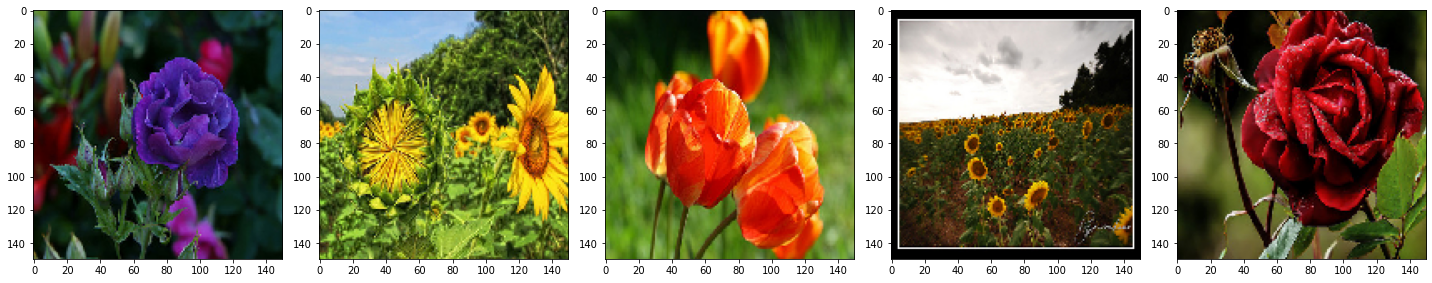

In [27]:
plotImages(sample_training_images[:5])  # Plot images 0-4

# Model Creation

## Define the model

The model consists of four convolution blocks with a max pool layer in each of them. Then we have a fully connected layer with 512 units, with a `relu` activation function. The model will output class probabilities for two classes — dogs and cats — using `softmax`. 

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

### Compile the model

As usual, we will use the `adam` optimizer. Since we output a softmax categorization, we'll use `sparse_categorical_crossentropy` as the loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so we are passing in the metrics argument.

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model Summary

Let's look at all the layers of our network using **summary** method.

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Train the model

It's time we train our network.

Since our batches are coming from a generator (`ImageDataGenerator`), we'll use `fit_generator` instead of `fit`.

In [31]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100


KeyboardInterrupt: ignored

### Visualizing results of the training

We'll now visualize the results we get after training our network.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

As we can see from the plots, training accuracy and validation accuracy are off by large margin and our model has achieved only around **70%** accuracy on the validation set (depending on the number of epochs you trained for).

This is a clear indication of overfitting. Once the training and validation curves start to diverge, our model has started to memorize the training data and is unable to perform well on the validation data.